In [1]:
print("Hello World!")

Hello World!


# CA
## Subject:
## Lecturer: 
### Student: Vitalis Smirnovs
### Student ID:
## 2022

#### Document Outline:
1. Introduction;
2. Data Description;
3. Exploratory Data Analysis;
4. Statistical Analysis:
    * Correlation;
    * ANOVA;
    * Simple Regression;
    * ML Regression;
    * ML Decision Tree;
5. Conclusion & Discussion;
6. References.

# 1. INTRODOCTION
#### The Irish Agri-Food Industry (source: https://www.teagasc.ie/rural-economy/rural-economy/agri-food-business/agriculture-in-ireland/)
Teagasc reports that in 2016 the agri-food sector in Ireland generated 7% of gross value added (€13.9 billion), 9.8% of Ireland’s merchandise exports and provided 8.5% of national employment. When employment in inputs, processing and marketing is included, the agri-food sector accounts for almost 10% of employment.

Agri-food exports account for over 11% of total Irish merchandise exports. However, when the low import content of agriculture and food exports and the low repatriation of profits earned in the agri-food sector are taken into account, it is estimated that the agri-food sector accounted in 2008 for around 40% of net foreign earnings from merchandise exports.

Irish food and drink exports grew dramatically in 2017, increasing by 11.6% and were valued at a record €12.7 billion. Since the period 2007-2009 the value of Irish agri-food exports has increased by over 61%..

Irish agriculture is primarily a grass-based industry.
The Census of Agriculture 2016 showed there were 137,500 farms compared to 139,860 farms in the 2010 Census of Agriculture.
The utilised agricultural area has declined marginally since the 2010 Census of Agriculture to 4,886,600 hectares. The average size of agricultural holding also decreased to 32 ha.
Approximately 84% (4.09 million ha) of agricultural area is devoted to grass (silage, hay and pasture), circa 9% (0.44 million ha) is in commonage and rough grazing and the remainder circa 9% (0.35 million ha) is allocated to cereals and other crop production.

Beef and Cattle production dominate the Irish agricultural economy. Milk and beef output accounted for over 61% of agricultural goods output at producer prices in 2017.
In terms of the destination of Irish food and drink exports in 2017, the United Kingdom at around 38% remained the principal market with sales of  €5.2 billion. Continental EU markets account for 30% of food and drink exports with a combined value of almost €4 billion.

Ireland in 2016 net exports of beef accounted for 85% of production, making Ireland the largest beef net exporter in the EU and fifth largest in the world.

There were approximately 7,387 Tillage farms with an average income of €37,028in 2017, a 20 percent increase on 2016.

Gross output value on Tillage farms was lower in 2017 despite higher prices and yields. The decline in cereals area on irish tillage farms was reflected in lower output value. The reduction in area planted and harvested was also reflected in lower levels of levels input expenditure. Both overhead costs and direct costs of production declined significantly on Tillage farms. Total costs declined by 14% on 2016 levels. With the decline in costs of production on the average Irish tillage farm exceeding the decline in the value of output, average family farm income in 2017 increased by 20%.
******************************************************************************************

Spring Cereals (source: https://www.teagasc.ie/crops/crops/cereal-crops/spring-cereals/#:~:text=Average%20yields%20for%20the%20last%20five%20years%20are,Spring%20Oats%20sown%20annually%2C%20yielding%20circa%207.3%20t%2Fha.)
Spring Barley,Oats and Wheat are the three main spring cereal crops. Spring Barley is the largest spring crop with approximately 120,000ha sown each year. Average yields for the last five years are 7.2 t/ha. There is, approximately 12,000 hectares of Spring Wheat sown each year here, with an average yield of 7.9 t/ha. The total acreage of Spring Oats sown has increased in the last number of years, with on average 10,000 hectares of Spring Oats sown annually, yielding circa 7.3 t/ha. See tables below for year on year sowing rates and average yields.

For high yields in Spring Barley growers should endavour to maximise the number of grains per meters squared.

National Area and Yield of Spring Barley

 	2014	2015	2016	2017	2018
National Area
(ha in 000)	155.6	132.4	113.5	115.2	126.9
Average Yield
(t/ha)	7.5	7.7	7.3	7.9	5.6
Data: www.cso.ie

Malting barley makes up approximately 10% of the spring barley area. Growing malting barley has many similarities with feed spring barley but the quality parameteres are more stringent. See here for details of growing Malting Barley as presented in the Malting Barley Spring Seminar 2016.

Spring Wheat
Spring Wheat is used for animal feed production, which accounts for 94% of output. Some, 6%, is sold to the milling market for human consumption, however this varies from year to year, due to difficulties meeting milling standards in our climate. Due to the quality of Irish milling wheat, it is generally mixed with higher protein wheats before being made into bread.

National Area and Yield of Spring Wheat

 	2011	2012	2013	2014	2015	2016	2017	2018
National Area
(ha in 000)	16.4	13.5	15.2	6.5	10.0	7.4	8.2	3.6
Average Yield
(t/ha)	8.3	6.1	8.1	8.3	8.6	8.0	8.2	6.4
Data: www.cso.ie

Spring Oats

Mainly used for the production of horse feeds and other animal feeds, some oats are used for milling, for human consumption, and also as seed for export. The demand for food grade oats is on the rise, on both domestic and international markets.

National Area and Yield of Spring Oats

 	2013	2014	2015	2016	2017	2018
National Area
(ha in 000)	21.3	8.5	12	9.8	10	7.5
Average Yield
(t/ha)	7.0	7.3	7.7	7.3	7.6	5.7
Data: www.cso.ie
**************************************************************************************************************
Source: https://www.stopclimatechaos.ie/assets/files/pdf/projected_economic_impacts_of_climate_change_on_irish_agriculture_oct_2013.pdf#:~:text=The%20most%20significant%20climate%20change%20impacts%20on%20Irish,provide%20sufficient%20resources%20for%20animals%20during%20extreme%20events.
Agriculture is one of the most climate-sensitive
industries in Ireland, as its primarily outdoor production
processes depend on particular levels of temperature
and rainfall. The report projects the total economic
costs of climate change in the region of €1-2 billion
per annum by mid-century. This figure represents
8.2% of the current contribution of the agricultural
sector to the national economy annually, and at the
upper level is greater than the Harvest 2020 targeted
increase of €1.5 billion in primary output.

The Irish agricultural sector contributes €24 billion to the
national economy annually, accounts for almost 10% of
Irish exports and provides 7.7% of national employment
(Teagasc, 2013). The sector accounts for about 7% of Irish
GDP with primary agriculture accounting for 2.5%(CSO,
2013). The sector is also set to grow significantly based on
the government’s ambitious “Food Harvest 2020” policy
vision (Department of Agriculture, Food and the Marine,
2010). Indicative targets include an increase of primary
output in the agriculture, fisheries and forestry sector by
€1.5 billion to €6.1 billion by 2020, equating to a 33%
increase over the 2007-2009 average.
Climate change impacts on agriculture, drawing on
research from the 1990’s have been unduly optimistic,
which in turn have helped to justify the relatively
complacent approach of climate policy in relation to the
agricultural sector. However, more recent research over the
last decade has identified a series of climate threats to
agriculture that should call for a revised perspective in
climate policy.
Three major areas of research that have revised these
findings are associated with the threshold model of
temperature effects on crop yields; a revised understanding
of carbon fertilisation; and the emerging analysis of
regional rainfall and climate changes.The threshold model
of temperature effects on crop yields suggests that crops
are more sensitive to temperature extremes than to
averages. It is often the case that yields rise gradually up to
a certain temperature threshold and then collapse rapidly
as temperatures cross this threshold point (Ackerman and Stanton, 2012). Recent field-based studies into the role of
carbon fertilisation have discovered that the positive
impacts, in relation to crop yield, of increased atmospheric
concentrations of CO2 are much less significant than
previously thought. The role of regional rainfall and climate
changes was captured in the recent Irish fodder crisis,
whereby a poor growing season in 2012 combined with a
long winter period resulted in a severe shortage of fodder
on many farms. This regional climate impact has lead to
economic costs conservatively estimated by the Irish
Creamery Milk Suppliers Association to be in the region of
€900 million (Anglo- Celt, 2013).

The purpose of this project is to explore the relatioonship between crop yield in Ireland and environmental factors affecting the yield. <br>
The main limitation of this study is data availability. Although some crop yiled data and rainfall data is available, it is outdated. The request to Mer Eireann to provide yearly temperature data remains unanswered on the day of submission of this project. Thus, temperature data has been simulated. 

# 2. DATA DESCRIPTION
Finding relevant data is the fist step in data analysis. Finding good/clean data is the dream of any data analist. <br>

Despite the fact that huge amounts of data is generated every second, agriculturel data is not easy to obtain, especially in Ireland. Many Irish farmers farm "old style" and do not have a digital fingerprint. Data generated is often collected as a part of compulsory schemes where farmers provide data to receive government subsidies or as a part of complience proof. In addition farmers who signed up to Teagasc services participate in annual survey. <br>

Data generated is of good quality but impossible to access by anyone but specially authorised persons. <br>

Desite the difficulties spares data is available on CSO.ie [1]. In this project crop yield data for years 1985-2007 was used [2]. This dataset was enhanced with weather data on rainfall [3] and air temperature (???) [4]. <br>

### 2.1 Crop Yield Dataset
Crop yeild dataset [2] can be found in *data.gov.ie* data repository, which in tern cites CSO.ie as a source.
This dataset is well structured and contains the following fields:<br>

| FIELD        	| DESCRIPTION          	|
|--------------	|----------------------	|
| STATISTIC    	| Code for a Statistic 	|
| Statistic    	| Statistic Name       	|
| TLIST(A1)    	| Year                 	|
| Year         	| Year                 	|
| C02039V02469 	| Crop Code            	|
| Type of Crop 	| Crop Type            	|
| UNIT         	| Unit of measurement  	|
| VALUE        	| Value field          	|

### 2.2 Rainfall Data

The crop field data is enhanced with weather data. More specifically with rainfall data that can be found on Met Eireann [3]. This dataset series cover the period 1850-2010 for 25 locations has been constructed by researchers at Maynooth University and Met Éireann. <br>
This data contsins monthly (Jan to Dec) rinfall for years 1850 through 2010.
<br>
Descriptive statistics for all data is presentted and discussed below.

## 3. EXPLORATORY DATA ANALYSIS

In [2]:
# THIS BLOCK CAINTAINS PACKAGES USED AT SOME STAGE DURING DATA ANALYSIS
# some may not have eneded up in the final analysis
# import libraries that are needed for this project
import numpy as np 
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pltpy
import seaborn as sns
import scipy.stats as stats
import termcolor
from termcolor import colored
#import pymc3 
# note: had to: pip install astroML & pip install pymc3
from astroML.plotting import setup_text_plots
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pickle 

C:\Users\offsm\anaconda3\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [3]:
# THESE ARE FUNCTIONS TO BEAUTIFY BORING OUTPUT
#************************************************
# https://forums.fast.ai/t/jupyter-notebook-enhancements-tips-and-tricks/17064/5
# these are the functions to help to make output look nicer and easier to read
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))                                           # for printing in bold

def printmd(string, color=None):                                               
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)  # printing in colour
    display(Markdown(colorstr))

### 3.1. Crop Yield Data: Data Manupulation and Descriptives


The first and handy step is to import data into the dataframe and have a quick look that data loaded correctly.

In [4]:
# data source: https://data.gov.ie/dataset/aqa03-crop-yield-1985-2007/resource/2bebaae8-f9a0-4080-9e67-a1f2e130a943
# Import data
df1 = pd.read_csv('dataCA2_v2.csv') # read in the data into a dataframe
df1                                      # display dataframe

,Year,Code,Crop,CropArea,Yield_ha,Yield,Unnamed: 6,Unnamed: 7
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0,NaN,386.2
1,1985,11,Total wheat,77.7,6.4,495.0,NaN,NaN
2,1985,111,Winter wheat,60.3,6.5,395.0,NaN,NaN
3,1985,112,Spring wheat,17.4,5.8,100.0,NaN,NaN
4,1985,12,Total oats,24.9,5.1,126.0,NaN,NaN
...,...,...,...,...,...,...,...,...
386,2007,4,Potatoes,11.7,34.0,399.0,NaN,NaN
387,2007,5,Turnips,NaN,NaN,NaN,NaN,NaN
388,2007,61,Sugar beet,NaN,NaN,NaN,NaN,NaN
389,2007,62,Fodder beet,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.drop('Unnamed: 6', inplace=True, axis=1)
df1

,Year,Code,Crop,CropArea,Yield_ha,Yield,Unnamed: 7
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0,386.2
1,1985,11,Total wheat,77.7,6.4,495.0,NaN
2,1985,111,Winter wheat,60.3,6.5,395.0,NaN
3,1985,112,Spring wheat,17.4,5.8,100.0,NaN
4,1985,12,Total oats,24.9,5.1,126.0,NaN
...,...,...,...,...,...,...,...
386,2007,4,Potatoes,11.7,34.0,399.0,NaN
387,2007,5,Turnips,NaN,NaN,NaN,NaN
388,2007,61,Sugar beet,NaN,NaN,NaN,NaN
389,2007,62,Fodder beet,NaN,NaN,NaN,NaN


To get an overview of the data **df.info()** is usefull. Table 1 shows that our data has 391 rows (rows index 0 to 390), and 6 columns with variables. Five of the variables are numerical - Year, code, CropArea, Yield_ha and Yield, while one - crop is nominal/categorical variables.

To ensure that data imported correctly **df.head()** and **df.tail()** are usefull to have a quick view of the top and bottom rows of data (see Table 2 and Table 3).

In [6]:
df1.drop('Unnamed: 7', inplace=True, axis=1)
df1

,Year,Code,Crop,CropArea,Yield_ha,Yield
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0
1,1985,11,Total wheat,77.7,6.4,495.0
2,1985,111,Winter wheat,60.3,6.5,395.0
3,1985,112,Spring wheat,17.4,5.8,100.0
4,1985,12,Total oats,24.9,5.1,126.0
...,...,...,...,...,...,...
386,2007,4,Potatoes,11.7,34.0,399.0
387,2007,5,Turnips,NaN,NaN,NaN
388,2007,61,Sugar beet,NaN,NaN,NaN
389,2007,62,Fodder beet,NaN,NaN,NaN


In [7]:
# have a look at the data, to see what it looks like
printmd("**Table 1: Data info**", color='red')      
print("----------------------------------")
print(df1.info())                                    # print data info on screen

printmd("**Table 2: Data head**", color='red')     
print("----------------------------------")
print(df1.head())                                    # view top of the data set

printmd("**Table 3: Data tail**", color='red')
print("----------------------------------")
print(df1.tail())                                    #view bottom of the data set#
printmd("**Table 4: Data Summary Stats**", color='red')                 # print table numbers and headings
printmd("----------------------------------------------", color='red')  # separate output by a line
print(df1.describe())     

<span style='color:red'>**Table 1: Data info**</span>

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      391 non-null    int64  
 1   Code      391 non-null    int64  
 2   Crop      391 non-null    object 
 3   CropArea  368 non-null    float64
 4   Yield_ha  368 non-null    float64
 5   Yield     368 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 18.5+ KB
None


<span style='color:red'>**Table 2: Data head**</span>

----------------------------------
   Year  Code                          Crop  CropArea  Yield_ha   Yield
0  1985     1  Total wheat, oats and barley     386.2       5.1  1986.0
1  1985    11                   Total wheat      77.7       6.4   495.0
2  1985   111                  Winter wheat      60.3       6.5   395.0
3  1985   112                  Spring wheat      17.4       5.8   100.0
4  1985    12                    Total oats      24.9       5.1   126.0


<span style='color:red'>**Table 3: Data tail**</span>

----------------------------------
     Year  Code                    Crop  CropArea  Yield_ha  Yield
386  2007     4                Potatoes      11.7      34.0  399.0
387  2007     5                 Turnips       NaN       NaN    NaN
388  2007    61              Sugar beet       NaN       NaN    NaN
389  2007    62             Fodder beet       NaN       NaN    NaN
390  2007     7  Kale and field cabbage       NaN       NaN    NaN


<span style='color:red'>**Table 4: Data Summary Stats**</span>

<span style='color:red'>----------------------------------------------</span>

              Year        Code    CropArea    Yield_ha        Yield
count   391.000000  391.000000  368.000000  368.000000   368.000000
mean   1996.000000   53.529412   60.465761   16.276902   536.256522
std       6.641748   53.407562   85.212043   18.614356   578.540756
min    1985.000000    1.000000    0.000000    0.000000     0.000000
25%    1990.000000    5.000000    8.350000    5.900000    89.525000
50%    1996.000000   13.000000   20.750000    7.200000   305.500000
75%    2002.000000  112.000000   68.600000   12.950000   795.525000
max    2007.000000  132.000000  386.200000   73.700000  2500.900000


Before conducting any further investigation. let's load the 2nd data set - Rainfall data.

In [8]:
# climate data
# https://www.met.ie/climate/available-data/long-term-data-sets/
df2 = pd.read_csv('climateData1.csv') # read in the data into a dataframe
df2                                      # display dataframe


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1850,113.5,86.4,38.6,138.3,59.7,54.5,103.4,76.3,70.5,62.7,113.1,104.0
1,1851,195.0,55.2,79.9,54.7,45.0,101.5,90.3,96.6,49.4,113.4,45.4,68.8
2,1852,161.4,92.4,44.6,44.4,70.2,179.4,68.6,110.1,57.3,88.7,223.2,208.2
3,1853,144.7,43.0,83.5,75.3,33.2,77.5,100.5,82.9,60.2,185.1,106.0,48.4
4,1854,138.6,36.0,37.3,18.8,100.0,110.4,102.6,60.5,47.8,77.8,74.6,94.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2006,57.6,54.6,120.3,47.3,126.2,29.8,55.9,70.8,162.6,145.6,142.3,170.5
157,2007,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1
158,2008,174.3,58.0,113.5,45.1,42.3,101.9,123.8,175.9,108.2,152.4,80.4,73.7
159,2009,152.9,36.5,48.7,120.9,90.7,73.2,174.7,148.4,49.4,129.9,244.9,105.4


In [9]:
# have a look at the data, to see what it looks like
printmd("**Table 5: Data info**", color='red')      
print("----------------------------------")
print(df2.info())                                    # print data info on screen

printmd("**Table 6: Data head**", color='red')     
print("----------------------------------")
print(df2.head())                                    # view top of the data set

printmd("**Table 7: Data tail**", color='red')
print("----------------------------------")
print(df2.tail())                                    #view bottom of the data set#
printmd("**Table 8: Data Summary Stats**", color='red')                 # print table numbers and headings
printmd("----------------------------------------------", color='red')  # separate output by a line
print(df2.describe()) 

<span style='color:red'>**Table 5: Data info**</span>

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    161 non-null    int64  
 1   Jan     161 non-null    float64
 2   Feb     161 non-null    float64
 3   Mar     161 non-null    float64
 4   Apr     161 non-null    float64
 5   May     161 non-null    float64
 6   Jun     161 non-null    float64
 7   Jul     161 non-null    float64
 8   Aug     161 non-null    float64
 9   Sep     161 non-null    float64
 10  Oct     161 non-null    float64
 11  Nov     161 non-null    float64
 12  Dec     161 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 16.5 KB
None


<span style='color:red'>**Table 6: Data head**</span>

----------------------------------
   Year    Jan   Feb   Mar    Apr    May    Jun    Jul    Aug   Sep    Oct  \
0  1850  113.5  86.4  38.6  138.3   59.7   54.5  103.4   76.3  70.5   62.7   
1  1851  195.0  55.2  79.9   54.7   45.0  101.5   90.3   96.6  49.4  113.4   
2  1852  161.4  92.4  44.6   44.4   70.2  179.4   68.6  110.1  57.3   88.7   
3  1853  144.7  43.0  83.5   75.3   33.2   77.5  100.5   82.9  60.2  185.1   
4  1854  138.6  36.0  37.3   18.8  100.0  110.4  102.6   60.5  47.8   77.8   

     Nov    Dec  
0  113.1  104.0  
1   45.4   68.8  
2  223.2  208.2  
3  106.0   48.4  
4   74.6   94.9  


<span style='color:red'>**Table 7: Data tail**</span>

----------------------------------
     Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
156  2006   57.6   54.6  120.3   47.3  126.2   29.8   55.9   70.8  162.6   
157  2007  107.9  107.8   80.3   26.9   65.9  141.3  133.0  100.4   52.8   
158  2008  174.3   58.0  113.5   45.1   42.3  101.9  123.8  175.9  108.2   
159  2009  152.9   36.5   48.7  120.9   90.7   73.2  174.7  148.4   49.4   
160  2010   93.8   52.6   86.2   56.9   47.5   54.2  139.2   43.7  136.0   

       Oct    Nov    Dec  
156  145.6  142.3  170.5  
157   52.2   75.0  123.1  
158  152.4   80.4   73.7  
159  129.9  244.9  105.4  
160   80.1  135.8   62.5  


<span style='color:red'>**Table 8: Data Summary Stats**</span>

<span style='color:red'>----------------------------------------------</span>

              Year         Jan         Feb         Mar         Apr  \
count   161.000000  161.000000  161.000000  161.000000  161.000000   
mean   1930.000000  112.395652   82.643478   80.035404   68.823602   
std      46.620811   39.026873   37.376366   31.822668   27.904607   
min    1850.000000   16.500000    6.500000   16.900000    5.300000   
25%    1890.000000   84.400000   54.100000   56.600000   45.900000   
50%    1930.000000  111.900000   81.000000   83.300000   67.600000   
75%    1970.000000  139.400000  107.400000  100.700000   83.600000   
max    2010.000000  205.100000  192.500000  184.800000  143.500000   

              May         Jun         Jul         Aug         Sep         Oct  \
count  161.000000  161.000000  161.000000  161.000000  161.000000  161.000000   
mean    71.055280   71.890062   82.469565   97.072671   90.686335  109.837267   
std     29.896201   32.913970   32.284577   37.574365   39.101038   39.859343   
min      7.700000    8.400000   18.900000   1

In [10]:
# clculate average yearly temperature
df2['averageRain'] = (df2['Jan'] +  df2['Feb'] +  df2['Mar'] 
                  +  df2['May'] +  df2['Jun'] +  df2['Jul'] 
                  +  df2['Aug'] +  df2['Sep'] +  df2['Oct'] 
                  +  df2['Nov'] +  df2['Apr'] +  df2['Dec']) / 12

In [11]:
df2

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
0,1850,113.5,86.4,38.6,138.3,59.7,54.5,103.4,76.3,70.5,62.7,113.1,104.0,85.083333
1,1851,195.0,55.2,79.9,54.7,45.0,101.5,90.3,96.6,49.4,113.4,45.4,68.8,82.933333
2,1852,161.4,92.4,44.6,44.4,70.2,179.4,68.6,110.1,57.3,88.7,223.2,208.2,112.375000
3,1853,144.7,43.0,83.5,75.3,33.2,77.5,100.5,82.9,60.2,185.1,106.0,48.4,86.691667
4,1854,138.6,36.0,37.3,18.8,100.0,110.4,102.6,60.5,47.8,77.8,74.6,94.9,74.941667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2006,57.6,54.6,120.3,47.3,126.2,29.8,55.9,70.8,162.6,145.6,142.3,170.5,98.625000
157,2007,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333
158,2008,174.3,58.0,113.5,45.1,42.3,101.9,123.8,175.9,108.2,152.4,80.4,73.7,104.125000
159,2009,152.9,36.5,48.7,120.9,90.7,73.2,174.7,148.4,49.4,129.9,244.9,105.4,114.633333


Keep only years that are in both datasets.

In [12]:
# keep only years after 1985 & before 2007
df2 = df2[(df2.Year >= 1985)]
df2 = df2[(df2.Year <= 2007)]
df2.head(20)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
135,1985,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
136,1986,136.2,6.5,121.1,74.1,124.0,95.4,68.1,174.7,7.5,99.9,138.4,179.3,102.100000
137,1987,56.0,79.7,101.6,73.6,32.2,107.6,47.5,83.7,111.0,144.5,79.1,100.7,84.766667
138,1988,194.6,79.9,114.7,42.2,83.0,49.4,131.1,120.5,80.2,150.3,55.5,72.8,97.850000
139,1989,89.2,102.2,134.3,83.6,20.9,65.4,23.8,105.8,59.9,147.0,60.0,119.1,84.266667
140,1990,135.3,192.5,38.2,52.0,37.3,101.6,58.4,71.5,39.7,178.6,74.8,121.0,91.741667
141,1991,103.4,89.0,109.3,121.3,7.7,91.9,65.2,39.7,79.0,125.3,120.7,63.2,84.641667
142,1992,66.7,71.6,107.9,103.1,55.8,39.4,101.0,142.3,97.8,56.3,131.6,86.8,88.358333
143,1993,133.2,27.7,67.1,104.3,135.0,95.7,87.8,46.1,135.0,62.5,84.8,187.1,97.191667
144,1994,148.3,154.0,119.6,97.9,67.9,55.4,91.9,83.3,87.3,69.7,102.3,159.0,103.050000


In [13]:
df2.describe()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1996.00000,111.556522,88.991304,87.686957,78.113043,72.026087,77.595652,75.508696,93.834783,83.386957,122.700000,109.578261,117.534783,93.209420
std,6.78233,41.761790,45.292031,29.239797,27.496550,36.383366,32.189954,25.309231,45.646255,39.949563,47.960476,38.987492,41.664980,9.009915
min,1985.00000,35.200000,6.500000,35.700000,26.900000,7.700000,29.800000,23.800000,13.000000,7.500000,52.200000,54.200000,52.000000,77.058333
25%,1990.50000,76.100000,58.100000,65.200000,59.700000,43.850000,53.600000,58.900000,67.900000,58.550000,67.400000,77.050000,88.050000,87.629167
50%,1996.00000,123.400000,79.900000,90.900000,79.900000,67.900000,79.700000,73.900000,83.700000,80.200000,144.500000,102.600000,119.100000,93.866667
75%,2001.50000,140.300000,110.650000,108.600000,100.000000,86.850000,98.700000,87.400000,115.650000,99.850000,160.750000,133.900000,147.100000,98.237500
max,2007.00000,194.600000,192.500000,134.300000,124.000000,139.500000,141.300000,133.000000,191.500000,173.600000,199.100000,187.300000,192.800000,116.108333


We can join datasets together and start the analysis.

Now that two datasets are in a relatively good shape, they can be joined together.

In [14]:
# left join in python
# Left-join based on year as we want to join year-specific data to each year row (crop)
 
df3= pd.merge(df1, df2, on='Year', how='left')
df3.head(20) # have a quicl look the join went ok

,Year,Code,Crop,CropArea,Yield_ha,Yield,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
1,1985,11,Total wheat,77.7,6.4,495.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
2,1985,111,Winter wheat,60.3,6.5,395.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
3,1985,112,Spring wheat,17.4,5.8,100.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
4,1985,12,Total oats,24.9,5.1,126.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
5,1985,121,Winter oats,9.1,6.2,56.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
6,1985,122,Spring oats,15.8,4.4,70.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
7,1985,13,Total barley,283.6,4.8,1365.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
8,1985,131,Winter barley,35.5,5.2,185.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
9,1985,132,Spring barley,248.1,4.8,1179.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333


In [15]:
df3

,Year,Code,Crop,CropArea,Yield_ha,Yield,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
1,1985,11,Total wheat,77.7,6.4,495.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
2,1985,111,Winter wheat,60.3,6.5,395.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
3,1985,112,Spring wheat,17.4,5.8,100.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
4,1985,12,Total oats,24.9,5.1,126.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2007,4,Potatoes,11.7,34.0,399.0,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333
387,2007,5,Turnips,NaN,NaN,NaN,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333
388,2007,61,Sugar beet,NaN,NaN,NaN,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333
389,2007,62,Fodder beet,NaN,NaN,NaN,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333


There seem to be cells with "Total" in names. On investigation these are are the totals/subtotals for some group of crops. 

In [16]:
df4 = df3[df3['Crop'].str.contains('Total ', regex=False, case=False, na=False)]
df4
df4['Crop'] .value_counts(normalize=False) # tabulate

Total barley                    23
Total wheat, oats and barley    23
Total oats                      23
Total wheat                     23
Name: Crop, dtype: int64

In [17]:
pd.pivot_table(df4, index=['Crop','Code'])

,,Apr,Aug,CropArea,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,Yield,Yield_ha,averageRain
Crop,Code,,,,,,,,,,,,,,,,,
Total barley,13,78.113043,93.834783,198.100000,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,1195.965217,6.100000,93.20942
Total oats,12,78.113043,93.834783,20.534783,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,135.326087,6.630435,93.20942
Total wheat,11,78.113043,93.834783,80.895652,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,659.039130,8.086957,93.20942
"Total wheat, oats and barley",1,78.113043,93.834783,299.539130,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,1990.182609,6.691304,93.20942


We can see that there are "total categories", which have codes 1, 11, 12, 13. These need to be excluded to avoid dpouble-counting.

In [18]:
# delete total categories (exclude repeating data)
df3=df3[(df3.Code != 1)]
df3=df3[(df3.Code != 11)]
df3=df3[(df3.Code != 12)]
df3=df3[(df3.Code != 13)]


In [19]:
df3.head(20)

,Year,Code,Crop,CropArea,Yield_ha,Yield,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
2,1985,111,Winter wheat,60.3,6.5,395.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
3,1985,112,Spring wheat,17.4,5.8,100.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
5,1985,121,Winter oats,9.1,6.2,56.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
6,1985,122,Spring oats,15.8,4.4,70.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
8,1985,131,Winter barley,35.5,5.2,185.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
9,1985,132,Spring barley,248.1,4.8,1179.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
10,1985,2,Beans and peas,2.3,0.0,0.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
11,1985,3,Oilseed rape,0.0,0.0,0.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
12,1985,4,Potatoes,32.1,20.8,668.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
13,1985,5,Turnips,8.7,53.5,466.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333


Information above can be visualised for better representation. Normally boxplot or histogram are useful for numerical data, while barchart is useful for categorical data.

In [20]:
nan_values = df3[df3['Crop'].isnull()]

print (nan_values)
df3[df3.isna().any(axis=1)]

Empty DataFrame
Columns: [Year, Code, Crop, CropArea, Yield_ha, Yield, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, averageRain]
Index: []


,Year,Code,Crop,CropArea,Yield_ha,Yield,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
220,1997,7,Kale and field cabbage,NaN,NaN,NaN,35.2,134.6,36.4,41.5,82.5,119.1,77.0,157.2,61.6,90.1,162.4,128.8,93.866667
237,1998,7,Kale and field cabbage,NaN,NaN,NaN,144.4,40.4,90.9,124.0,39.7,132.4,83.7,82.7,96.0,157.4,130.3,135.6,104.791667
254,1999,7,Kale and field cabbage,NaN,NaN,NaN,135.5,61.6,59.7,92.1,60.5,56.2,44.1,109.5,173.6,65.1,102.6,192.8,96.108333
271,2000,7,Kale and field cabbage,NaN,NaN,NaN,66.3,111.7,35.7,79.9,66.7,55.3,58.5,81.8,120.8,180.0,180.4,158.6,99.641667
288,2001,7,Kale and field cabbage,NaN,NaN,NaN,73.6,80.5,89.2,83.0,40.2,60.8,74.8,106.0,66.2,130.6,59.5,60.3,77.058333
305,2002,7,Kale and field cabbage,NaN,NaN,NaN,151.6,160.2,63.3,102.1,139.5,105.7,70.4,61.9,39.3,199.1,187.3,112.9,116.108333
319,2003,5,Turnips,NaN,NaN,NaN,81.8,65.2,56.6,79.3,112.0,95.8,93.5,17.2,57.2,61.8,125.1,89.3,77.900000
321,2003,62,Fodder beet,NaN,NaN,NaN,81.8,65.2,56.6,79.3,112.0,95.8,93.5,17.2,57.2,61.8,125.1,89.3,77.900000
322,2003,7,Kale and field cabbage,NaN,NaN,NaN,81.8,65.2,56.6,79.3,112.0,95.8,93.5,17.2,57.2,61.8,125.1,89.3,77.900000
336,2004,5,Turnips,NaN,NaN,NaN,123.4,52.3,85.9,67.4,47.5,82.4,59.3,122.8,101.9,166.7,54.2,89.5,87.775000


<span style='color:red'>**Figure 1A. Crop Yield**</span>

<Figure size 1080x720 with 0 Axes>

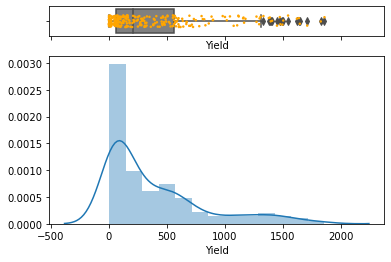

<span style='color:red'>**Figure 1B. Yield per hectar**</span>

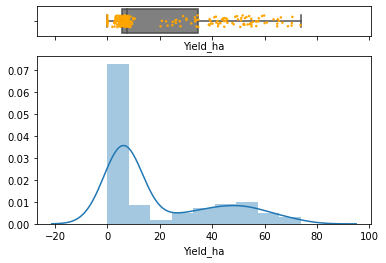

<span style='color:red'>**Figure 1C. Average Rainfall**</span>

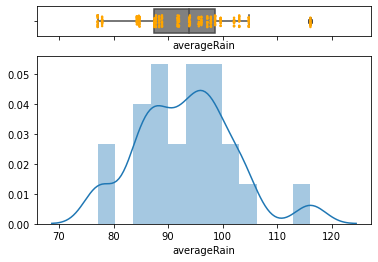

In [21]:
# parts of the code are adapted from here:
# https://python-graph-gallery.com/39-hidden-data-under-boxplot/

import matplotlib.pyplot as plt
from astroML.plotting import setup_text_plots


printmd("**Figure 1A. Crop Yield**", color='red')           # table heading
fig = plt.figure(figsize=(15, 10))                          # figure size
f, (ax_box, ax_hist) = plt.subplots(2,                      # divide the plot into two subplots 
                                    sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}) # (15% and 85% of total area)

ax = sns.boxplot(x='Yield', data=df3, ax=ax_box, color="grey")             # boxplot in grey colour

ax = sns.stripplot(x='Yield', data=df3, 
                   ax=ax_box, color="orange", 
                   jitter=0.2, size=2.5)                     # add data points to boxplot in orange colour

ax = sns.distplot(df3["Yield"], ax=ax_hist)              # add histogram plot            
plt.show() 

printmd("**Figure 1B. Yield per hectar**", color='red')                   # similar to code above
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
ax = sns.boxplot(x='Yield_ha', data=df3, ax=ax_box, color="grey")
ax = sns.stripplot(x='Yield_ha', data=df3, ax=ax_box, color="orange", jitter=0.2, size=2.5)
ax = sns.distplot(df3["Yield_ha"], ax=ax_hist)
plt.show() 

printmd("**Figure 1C. Average Rainfall**", color='red')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
ax = sns.boxplot(x='averageRain', data=df3, ax=ax_box, color="grey")
ax = sns.stripplot(x='averageRain', data=df3, ax=ax_box, color="orange", jitter=0.2, size=2.5)
ax = sns.distplot(df3["averageRain"], ax=ax_hist)
plt.show() 

<span style='color:red'>**Figure** **2** **Barchart of** **Jan**</span>

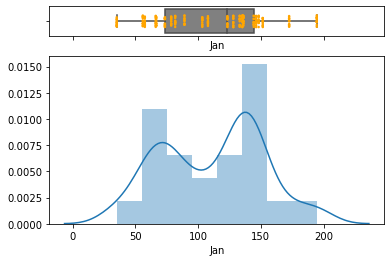

<span style='color:red'>**Figure** **3** **Barchart of** **Feb**</span>

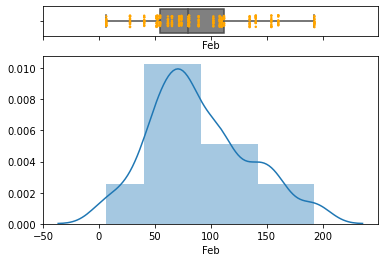

<span style='color:red'>**Figure** **4** **Barchart of** **Mar**</span>

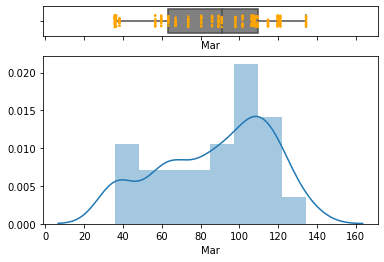

<span style='color:red'>**Figure** **5** **Barchart of** **Jun**</span>

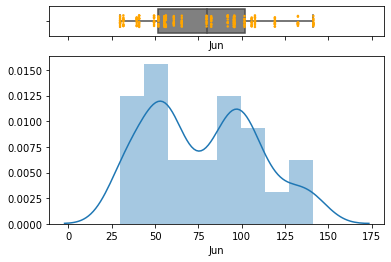

<span style='color:red'>**Figure** **6** **Barchart of** **Jul**</span>

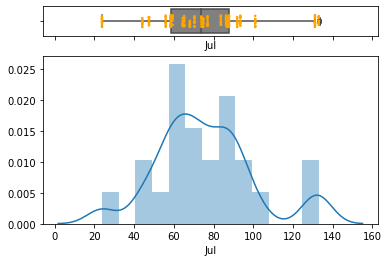

<span style='color:red'>**Figure** **7** **Barchart of** **Aug**</span>

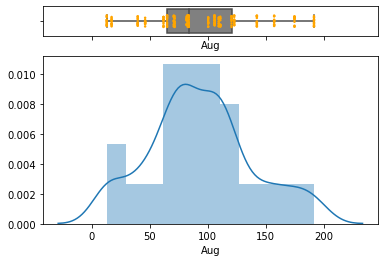

<span style='color:red'>**Figure** **8** **Barchart of** **Sep**</span>

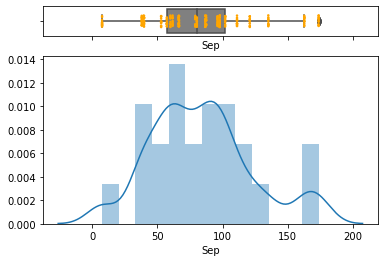

<span style='color:red'>**Figure** **9** **Barchart of** **Oct**</span>

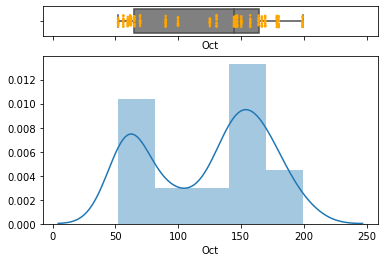

<span style='color:red'>**Figure** **10** **Barchart of** **Nov**</span>

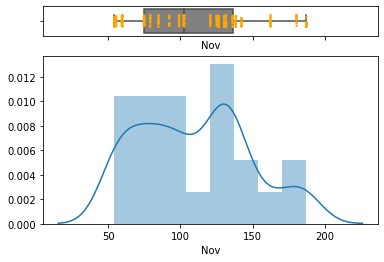

<span style='color:red'>**Figure** **11** **Barchart of** **Dec**</span>

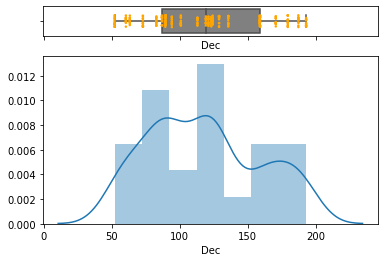

<span style='color:red'>**Figure** **12** **Barchart of** **Jan**</span>

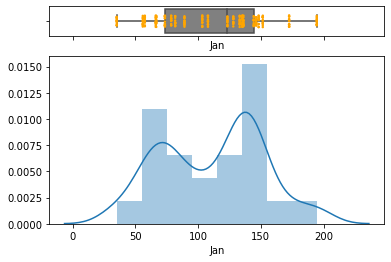

<span style='color:red'>**Figure** **13** **Barchart of** **Feb**</span>

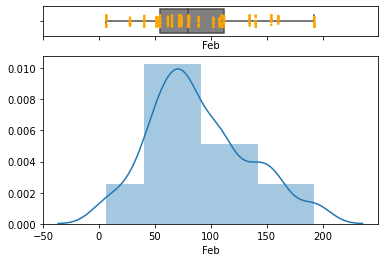

<span style='color:red'>**Figure** **14** **Barchart of** **Mar**</span>

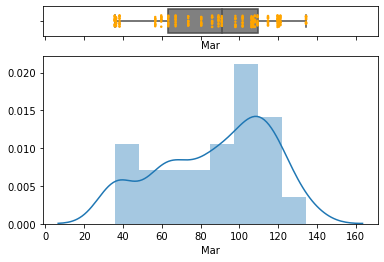

<span style='color:red'>**Figure** **15** **Barchart of** **Jun**</span>

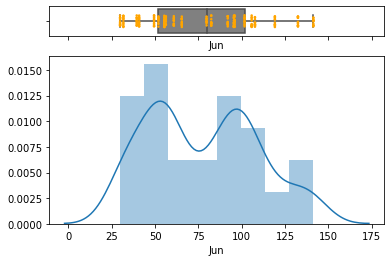

<span style='color:red'>**Figure** **16** **Barchart of** **Jul**</span>

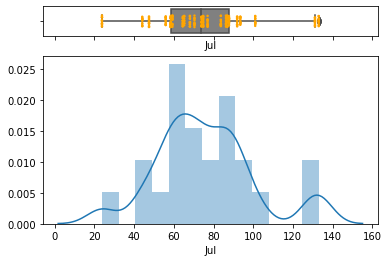

<span style='color:red'>**Figure** **17** **Barchart of** **Aug**</span>

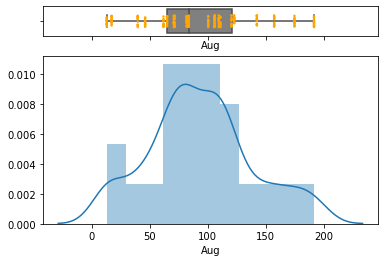

<span style='color:red'>**Figure** **18** **Barchart of** **Sep**</span>

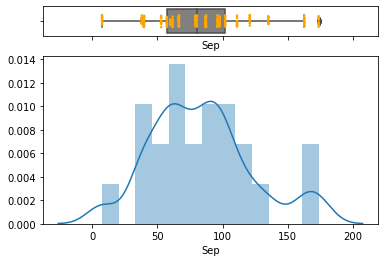

<span style='color:red'>**Figure** **19** **Barchart of** **Oct**</span>

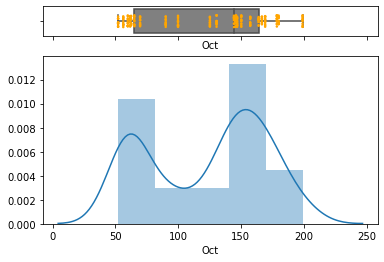

<span style='color:red'>**Figure** **20** **Barchart of** **Nov**</span>

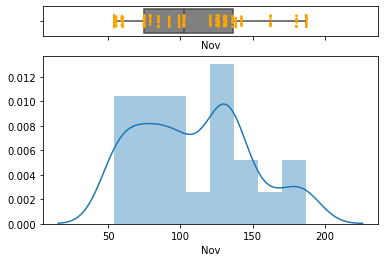

<span style='color:red'>**Figure** **21** **Barchart of** **Dec**</span>

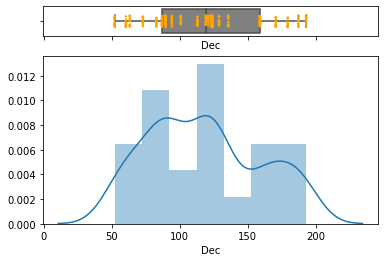

In [22]:
from astroML.plotting import setup_text_plots
vars_list=['Jan', 'Feb', 'Mar', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
i=2                       # counter for table numbers
while i<=17:
    # loop over vars_list
     for var in vars_list:
        # print table numbers and headings
        printmd("**Figure** " + f'**{i}**'+ ' '+ '**Barchart of**' + ' ' + f'**{var}**', color='red') 
        
        
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        ax = sns.boxplot(x=f'{var}', data=df3, ax=ax_box, color="grey")
        ax = sns.stripplot(x=f'{var}', data=df3, ax=ax_box, color="orange", jitter=0.2, size=2.5)
        ax = sns.distplot(df3[f'{var}'], ax=ax_hist)
        plt.show() 
            
        i=i+1

### 4. Exploratory Data Analysis
Are there patterns in the data?
Are specific crops have higher yield?
Is yeald higher in some years?
Is rainfall higher in some years?
Does yield has the same pattern as rainfall?

Please, scroll down to Table 9 to see actual Summary Statistics by Group to see if the visual representation of data gives a good representation of actual data statistics.

<span style='color:red'>**Figure 6: Boxplots**</span>

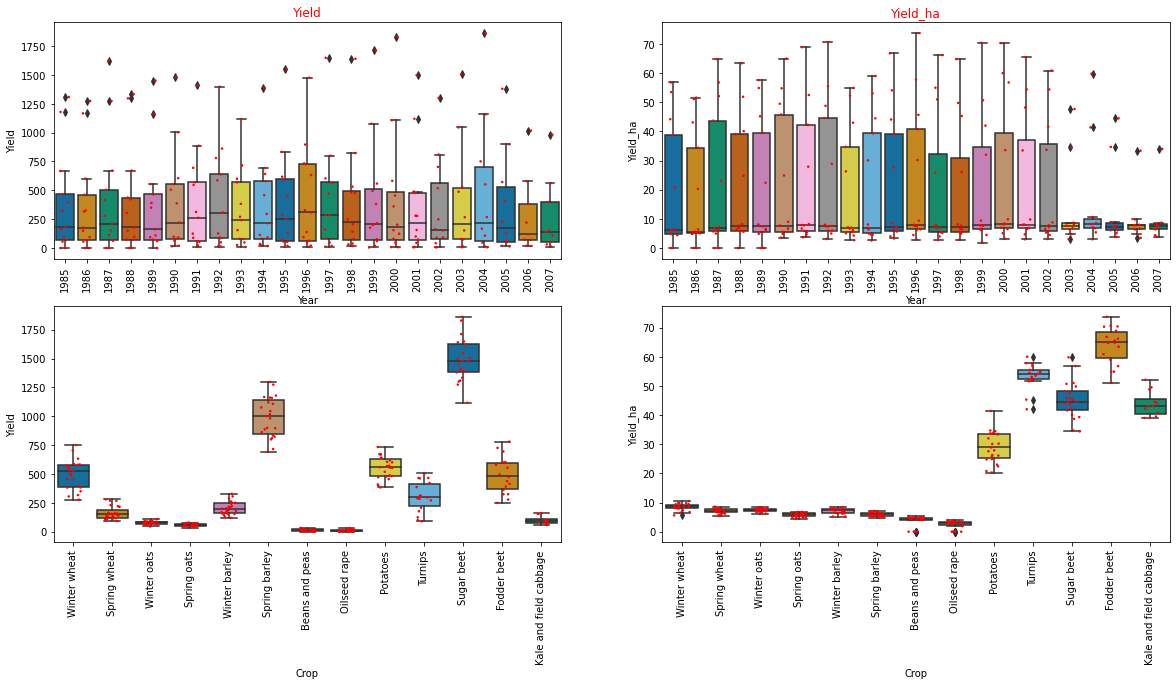

In [23]:
printmd('**Figure 6: Boxplots**', color='red') # print figure number
fig = plt.figure(figsize=(20, 20))             # specify figuresize
ax = fig.add_subplot(421)                      # 4x2 subplots
plt.title("Yield", c='red')               # title
ax = sns.boxplot(y='Yield', x= 'Year', data=df3, palette="colorblind")                     # boxplot
ax = sns.stripplot(y='Yield',  x= 'Year', data=df3, color="red", jitter=0.2, size=2.5)     # add data points
ax.tick_params(axis='x', labelrotation=90)

ax = fig.add_subplot(422)
plt.title("Yield_ha", c='red')               
ax = sns.boxplot(y='Yield_ha',  x= 'Year', data=df3, palette="colorblind")
ax = sns.stripplot(y='Yield_ha',  x= 'Year', data=df3, color="red", jitter=0.2, size=2.5)
ax.tick_params(axis='x', labelrotation=90)

ax = fig.add_subplot(423)
ax = sns.boxplot(y='Yield', x= 'Crop', data=df3, palette="colorblind")
ax = sns.stripplot(y='Yield',  x= 'Crop', data=df3, color="red", jitter=0.2, size=2.5) 
ax.tick_params(axis='x', labelrotation=90)

ax = fig.add_subplot(424)
ax = sns.boxplot(y='Yield_ha', x= 'Crop', data=df3, palette="colorblind")
ax = sns.stripplot(y='Yield_ha',  x= 'Crop', data=df3, color="red", jitter=0.2, size=2.5)

ax.tick_params(axis='x', labelrotation=90)
plt.show()


In [24]:
corr= np.round(df3.corr(), 2)  # correlation matrix
print(corr)                   # print correlation matrix on screen

             Year  Code  CropArea  Yield_ha  Yield   Jan   Feb   Mar   Apr  \
Year         1.00 -0.00     -0.00     -0.09  -0.01 -0.10 -0.01 -0.39 -0.06   
Code        -0.00  1.00      0.47     -0.40   0.11  0.00  0.00  0.00  0.00   
CropArea    -0.00  0.47      1.00     -0.23   0.56 -0.02 -0.03  0.01 -0.02   
Yield_ha    -0.09 -0.40     -0.23      1.00   0.40  0.02  0.06 -0.01  0.05   
Yield       -0.01  0.11      0.56      0.40   1.00 -0.01  0.00 -0.02  0.01   
Jan         -0.10  0.00     -0.02      0.02  -0.01  1.00  0.09  0.15  0.07   
Feb         -0.01  0.00     -0.03      0.06   0.00  0.09  1.00 -0.30 -0.28   
Mar         -0.39  0.00      0.01     -0.01  -0.02  0.15 -0.30  1.00  0.09   
Apr         -0.06  0.00     -0.02      0.05   0.01  0.07 -0.28  0.09  1.00   
May          0.22  0.00      0.01     -0.07  -0.04  0.13 -0.22 -0.15 -0.12   
Jun          0.01  0.00      0.02     -0.03  -0.01 -0.11  0.01 -0.35  0.00   
Jul          0.09 -0.00      0.00     -0.04  -0.03  0.28 -0.01  

<span style='color:red'>**Figure 7: Correlation heatmap**</span>

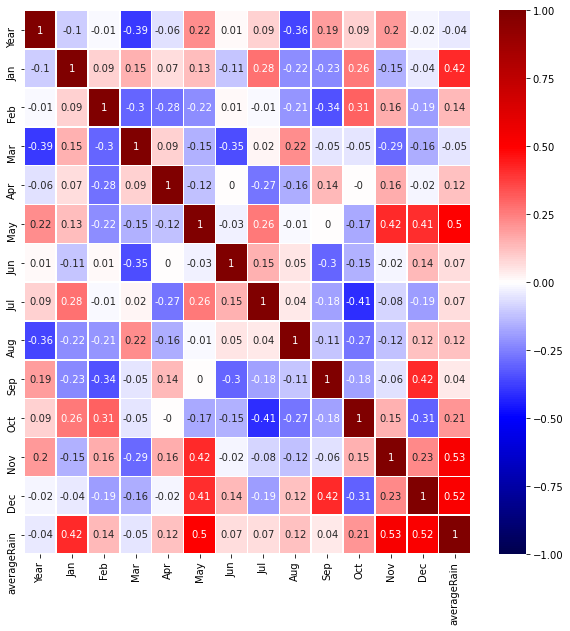

In [48]:
printmd("**Figure 7: Correlation heatmap**", color="red")

fig  = plt.figure(figsize=(10, 10))                                               # size of figure
sns.heatmap(corr, cmap="seismic", vmin=-1, vmax=1, annot=True, linewidths=.5)   # heatmap of correlation coefficients
plt.show()

In [40]:
pd.pivot_table(df3, index=['Crop','Code'])

,,Apr,Aug,CropArea,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,Yield,Yield_ha,averageRain
Crop,Code,,,,,,,,,,,,,,,,,
Beans and peas,2,78.113043,93.834783,3.439130,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,13.330435,3.656522,93.20942
Fodder beet,62,78.113043,93.834783,7.694444,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,493.572222,63.777778,93.20942
Kale and field cabbage,7,78.113043,93.834783,2.250000,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,98.891667,43.808333,93.20942
Oilseed rape,3,78.113043,93.834783,3.717391,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,10.621739,2.434783,93.20942
Potatoes,4,78.113043,93.834783,19.960870,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,553.756522,29.130435,93.20942
Spring barley,132,78.113043,93.834783,168.891304,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,991.647826,5.908696,93.20942
Spring oats,122,78.113043,93.834783,10.104348,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,57.426087,5.752174,93.20942
Spring wheat,112,78.113043,93.834783,22.160870,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,160.930435,7.143478,93.20942
Sugar beet,61,78.113043,93.834783,32.976190,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,1484.819048,45.176190,93.20942


In [50]:
printmd("**Table 10: Correlation Matrix**", color="red")

# generate dummy vars for categorical variables:
df3.loc[df3['Crop'] == "Beans and peas", 'Beans'] = 1
df3['Beans'] = df3['Beans'].fillna(0)
df3.loc[df3['Crop'] == "Fodder beet", 'FBeet'] = 1
df3['FBeet'] = df3['FBeet'].fillna(0)
df3.loc[df3['Crop'] == "Kale and field cabbage", 'Kale'] = 1
df3['Kale'] = df3['Kale'].fillna(0)
df3.loc[df3['Crop'] == "Oilseed rape", 'Oilseed'] = 1
df3['Oilseed'] = df3['Oilseed'].fillna(0)
df3.loc[df3['Crop'] == "Potatoes", 'Potatoes'] = 1
df3['Potatoes'] = df3['Potatoes'].fillna(0)
df3.loc[df3['Crop'] == "Spring barley", 'SBarley'] = 1
df3['SBarley'] = df3['SBarley'].fillna(0)
df3.loc[df3['Crop'] == "Spring oats", 'SOats'] = 1
df3['SOats'] = df3['SOats'].fillna(0)
df3.loc[df3['Crop'] == "Spring wheat", 'SWheat'] = 1
df3['SWheat'] = df3['SWheat'].fillna(0)
df3.loc[df3['Crop'] == "Sugar beet", 'SBeat'] = 1
df3['SBeat'] = df3['SBeat'].fillna(0)
df3.loc[df3['Crop'] == "Turnips", 'Turnips'] = 1
df3['Turnips'] = df3['Turnips'].fillna(0)
df3.loc[df3['Crop'] == "Winter barley", 'WBarley'] = 1
df3['WBarley'] = df3['WBarley'].fillna(0)
df3.loc[df3['Crop'] == "Winter oats", 'WOats'] = 1
df3['WOats'] = df3['WOats'].fillna(0)
df3.loc[df3['Crop'] == "Winter wheat", 'Wwheat'] = 1
df3['Wwheat'] = df3['Wwheat'].fillna(0)

df3.head(20)                     # a quick look at the data frame
corr= np.round(df3.corr(), 2)  # correlation matrix
print(corr)                   # print correlation matrix on screen

<span style='color:red'>**Table 10: Correlation Matrix**</span>

             Year  Code  CropArea  Yield_ha  Yield   Jan   Feb   Mar   Apr  \
Year         1.00 -0.00     -0.00     -0.09  -0.01 -0.10 -0.01 -0.39 -0.06   
Code        -0.00  1.00      0.47     -0.40   0.11  0.00  0.00  0.00  0.00   
CropArea    -0.00  0.47      1.00     -0.23   0.56 -0.02 -0.03  0.01 -0.02   
Yield_ha    -0.09 -0.40     -0.23      1.00   0.40  0.02  0.06 -0.01  0.05   
Yield       -0.01  0.11      0.56      0.40   1.00 -0.01  0.00 -0.02  0.01   
Jan         -0.10  0.00     -0.02      0.02  -0.01  1.00  0.09  0.15  0.07   
Feb         -0.01  0.00     -0.03      0.06   0.00  0.09  1.00 -0.30 -0.28   
Mar         -0.39  0.00      0.01     -0.01  -0.02  0.15 -0.30  1.00  0.09   
Apr         -0.06  0.00     -0.02      0.05   0.01  0.07 -0.28  0.09  1.00   
May          0.22  0.00      0.01     -0.07  -0.04  0.13 -0.22 -0.15 -0.12   
Jun          0.01  0.00      0.02     -0.03  -0.01 -0.11  0.01 -0.35  0.00   
Jul          0.09 -0.00      0.00     -0.04  -0.03  0.28 -0.01  

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

vars_list1 = [ 'Yield', 'Yield_ha']                      # test the mean of these vars
vars_list2 = ['Crop', 'Year', 'averageRain']          # between the groups of these vars
printmd("**Table 11. ANOVA Analysis**", color="red")
for i in vars_list1:
    for j in vars_list2:
        printmd(f'{i} by **{j}**', color='red')
        mc = MultiComparison(df3[f'{i}'], df3[f'{j}']) # multigroup mean comparison
        mc_results = mc.tukeyhsd()                   # Turkey test for mean equality
        print(mc_results)     

<span style='color:red'>**Table 11. ANOVA Analysis**</span>

<span style='color:red'>Yield by **Crop**</span>

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
        group1                 group2          meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------------------------------
        Beans and peas            Fodder beet   480.2418  0.001   371.8834   588.6002   True
        Beans and peas Kale and field cabbage    85.5612 0.4957   -37.0557   208.1781  False
        Beans and peas           Oilseed rape    -2.7087    0.9  -104.2451    98.8277  False
        Beans and peas               Potatoes   540.4261  0.001   438.8897   641.9625   True
        Beans and peas          Spring barley   978.3174  0.001    876.781  1079.8538   True
        Beans and peas            Spring oats    44.0957    0.9   -57.4408   145.6321  False
        Beans and peas           Spring wheat      147.6  0.001    46.0636   249.1364   True
        Beans and peas             Sugar beet  1471.4886  0.001  1367.

<span style='color:red'>Yield by **Year**</span>

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj   lower    upper   reject
-------------------------------------------------------
  1985   1986  -17.0769   0.9 -663.2449 629.0911  False
  1985   1987   35.2308   0.9 -610.9373 681.3988  False
  1985   1988    9.7692   0.9 -636.3988 655.9373  False
  1985   1989   -3.1538   0.9 -649.3219 643.0142  False
  1985   1990   16.1538   0.9 -630.0142 662.3219  False
  1985   1991   10.3077   0.9 -635.8603 656.4757  False
  1985   1992   26.6923   0.9 -619.4757 672.8603  False
  1985   1993  -47.6154   0.9 -693.7834 598.5526  False
  1985   1994  -21.1538   0.9 -667.3219 625.0142  False
  1985   1995    1.6154   0.9 -644.5526 647.7834  False
  1985   1996   43.7231   0.9 -602.4449 689.8911  False
  1985   1997     37.25   0.9 -622.2425 696.7425  False
  1985   1998   15.2917   0.9 -644.2008 674.7841  False
  1985   1999   36.7417   0.9 -622.7508 696.2341  False
  1985   2000    35.275   0.9 -624.2175 694.7675

<span style='color:red'>Yield by **averageRain**</span>

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2        meandiff p-adj   lower    upper   reject
-------------------------------------------------------------------------------
 77.05833333333334  77.89999999999999     38.17   0.9 -667.2095 743.5495  False
 77.05833333333334  84.26666666666667   -3.1038   0.9 -662.5963 656.3886  False
 77.05833333333334  84.64166666666667   10.3577   0.9 -649.1348 669.8502  False
 77.05833333333334  84.76666666666667   35.2808   0.9 -624.2117 694.7732  False
 77.05833333333334  87.48333333333333     -1.74   0.9 -707.1195 703.6395  False
 77.05833333333334  87.77500000000002    115.63   0.9 -589.7495 821.0095  False
 77.05833333333334  88.35833333333333   26.7423   0.9 -632.7502 686.2348  False
 77.05833333333334  88.88333333333333   -106.75   0.9 -833.1903 619.6903  False
 77.05833333333334  91.74166666666667   16.2038   0.9 -643.2886 675.6963  False
 77.05833333333334  91.98333333333333   

<span style='color:red'>Yield_ha by **Crop**</span>

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
        group1                 group2         meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------
        Beans and peas            Fodder beet  60.1213  0.001  56.6676  63.5749   True
        Beans and peas Kale and field cabbage  40.1518  0.001  36.2437  44.0599   True
        Beans and peas           Oilseed rape  -1.2217    0.9  -4.4579   2.0145  False
        Beans and peas               Potatoes  25.4739  0.001  22.2377  28.7101   True
        Beans and peas          Spring barley   2.2522 0.4996   -0.984   5.4884  False
        Beans and peas            Spring oats   2.0957 0.6008  -1.1405   5.3318  False
        Beans and peas           Spring wheat    3.487  0.022   0.2508   6.7231   True
        Beans and peas             Sugar beet  41.5197  0.001  38.2073   44.832   True
        Beans and peas                Turni

<span style='color:red'>Yield_ha by **Year**</span>

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
  1985   1986  -1.0769   0.9 -31.3471 29.1933  False
  1985   1987   2.3846   0.9 -27.8856 32.6548  False
  1985   1988   1.0154   0.9 -29.2548 31.2856  False
  1985   1989   0.8769   0.9 -29.3933 31.1471  False
  1985   1990   3.3692   0.9 -26.9009 33.6394  False
  1985   1991   2.8692   0.9 -27.4009 33.1394  False
  1985   1992      4.0   0.9 -26.2702 34.2702  False
  1985   1993   0.6769   0.9 -29.5933 30.9471  False
  1985   1994   1.8538   0.9 -28.4163  32.124  False
  1985   1995   2.5615   0.9 -27.7086 32.8317  False
  1985   1996   4.1308   0.9 -26.1394 34.4009  False
  1985   1997    1.391   0.9 -29.5033 32.2854  False
  1985   1998   0.4577   0.9 -30.4367 31.3521  False
  1985   1999    1.566   0.9 -29.3283 32.4604  False
  1985   2000   4.1077   0.9 -26.7867 35.0021  False
  1985   2001    2.391   0.9 -28.5033 33.2854 

<span style='color:red'>Yield_ha by **averageRain**</span>

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj  lower    upper  reject
----------------------------------------------------------------------------
 77.05833333333334  77.89999999999999  -7.8433   0.9 -40.8873 25.2007  False
 77.05833333333334  84.26666666666667  -1.5141   0.9 -32.4085 29.3803  False
 77.05833333333334  84.64166666666667   0.4782   0.9 -30.4162 31.3726  False
 77.05833333333334  84.76666666666667  -0.0064   0.9 -30.9008  30.888  False
 77.05833333333334  87.48333333333333  -8.2433   0.9 -41.2873 24.8007  False
 77.05833333333334  87.77500000000002  -5.4733   0.9 -38.5173 27.5707  False
 77.05833333333334  88.35833333333333    1.609   0.9 -29.2854 32.5033  False
 77.05833333333334  88.88333333333333 -11.6722   0.9 -45.7028 22.3584  False
 77.05833333333334  91.74166666666667   0.9782   0.9 -29.9162 31.8726  False
 77.05833333333334  91.98333333333333   0.1705   0.9 -30.7239 31.0649  False

Lenear Regression Model
In statistics, linear regression is a linear approach to modelling the relationship between a response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable (as in our project data) is called simple linear regression.

A linear regression model assumes that the relationship between the dependent variable y and the p-vector of regressors x is linear. This relationship is modeled through a disturbance term or error variable ε — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus the model takes the form:





where:
 - dependent variable,
 - model constant (intercept),
 - estimator (parameter),
 - independent variable,
 - error term (noise). [1]

Fitting a linear model to a given data set usually requires estimating the regression coefficients  such that the error term  is minimized. For example, it is common to use the sum of squared errors  as the quality of the fit.[1]

Fitting the Model using scikit learn
LinearRegression fits a linear model with coefficients  to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. [2]

In [58]:
df=df3["Yield"]
df

2      395.0
3      100.0
5       56.0
6       70.0
8      185.0
       ...  
386    399.0
387      NaN
388      NaN
389      NaN
390      NaN
Name: Yield, Length: 299, dtype: float64

In [60]:
df3 = df3.dropna()

In [61]:
# mean values of yield and yield_ha
av_yield=np.mean(df3[["Yield"]])
av_yield_ha=np.mean(df3[["Yield_ha"]])
print(av_yield )
print(av_yield_ha)

Yield    383.299275
dtype: float64
Yield_ha    19.410145
dtype: float64


Four simple regression models are compared below:

Please, note, that more models were tried out but these four were deemed worthy of leaving here.

The first two models have "tip" as a dependent variable while the next two models have a "tip_pp". The idea is that may be we can esier estimate tip per person and predict it in future.

Another difference is that 1st and 3rd models have no "bill_pp" variable on the list of explanotary vars. The idea is that we do not know how much people are going to spend in advance ( we can see the size, gender, etc.) so we can either use the average expenditure or not to use it at all.

In [62]:
# import neccessary modules
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

<span style='color:red'>**Model 1: Yield**</span>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1207
Date:                Thu, 19 May 2022   Prob (F-statistic):              0.886
Time:                        00:36:15   Log-Likelihood:                -2067.3
No. Observations:                 276   AIC:                             4141.
Df Residuals:                     273   BIC:                             4152.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2121.8471   8120.529      0.261      0.7

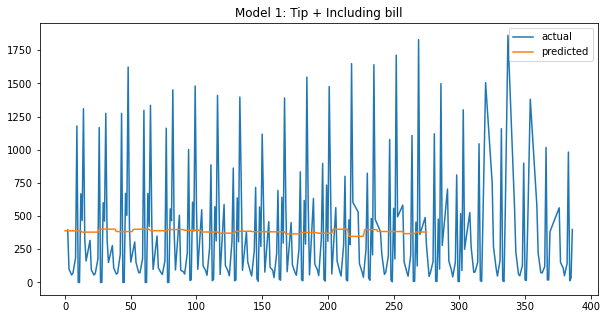

In [63]:

dat =df3                                                                       # data = our data frame
printmd("**Model 1: Yield**", color= "red")                    # print a header
X = df3[['Year', 'averageRain']].values                                                 # list of explanatory vars
X = sm.add_constant(X)                                                        # add constant
y = df3['Yield'].values                                                          # dependent var

olsmod = sm.OLS(y, X)    # ols model
olsres = olsmod.fit()    # fit model
print(olsres.summary())  # print results

ypred = olsres.predict(X) # predict based on model estimated

fig = plt.figure(figsize=(10, 5))        # plot figure
ax = plt.plot(df3['Yield'], label="actual")  # actual tip values
ax = plt.plot(ypred, label="predicted")   # vs predicted tip values
plt.title('Model 1: Tip + Including bill')
plt.legend()

# Model evaluation (to asses accuracy):
print('Mean Absolute Error:', metrics.mean_absolute_error(df3['Yield'], ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(df3['Yield'], ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df3['Yield'], ypred)))
print('R2:',olsres.rsquared)

M1_MRSEadj= int(((np.sqrt(metrics.mean_squared_error(df3['Yield'], ypred)))/av_yield)*100)
M1_Rsq=np.round(olsres.rsquared*100, 1)
print('R2:', metrics.r2_score(y, ypred)) # another way to pull R2.